# <center> **Assignment 09** </center>
## <center> **Neural networks** </center>
## <center> **Benedek Dankó** </center>

#### 1 - 2. Implement fully connected neural network via using only numpy

In [1]:
%tensorflow_version 2.x

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd


%matplotlib inline

In [6]:
weights = np.load('weights.npy', allow_pickle=True)

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test.reshape(10000, 28*28)/255

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
def pred_nn(weights, inputs):
    layer1 = (weights[0].T@inputs.T + weights[1][None].T).clip(0,)
    layer2 = (weights[2].T@layer1 + weights[3][None].T).clip(0,)
    layer3 = (weights[4].T@layer2 + weights[5][None].T).clip(0,)
    layer4 = weights[6].T@layer3 + weights[7][None].T
    return (np.exp(layer4)/np.exp(layer4).sum(0)).T

In [9]:
x_test[:3].shape, pred_nn(weights, x_test[:3]).shape

((3, 784), (3, 10))

#### 3. Same architecture via tensorflow/keras

In [11]:
# Create model, add weights manually:
model = keras.Sequential()
model.add(keras.layers.Dense(750, activation='relu', input_dim=784))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.add_weight(shape=weights[0].shape)
model.add_weight(shape=weights[2].shape)
model.add_weight(shape=weights[4].shape)
model.add_weight(shape=weights[6].shape)

<tf.Variable 'Variable:0' shape=(500, 10) dtype=float32, numpy=
array([[ 0.05621386,  0.00207841,  0.01185557, ..., -0.01047211,
        -0.05307059,  0.06543068],
       [ 0.03777606, -0.07401527,  0.02762378, ...,  0.05453471,
         0.09884361, -0.0740121 ],
       [ 0.01261961,  0.03447904,  0.02795926, ...,  0.03520859,
         0.0788138 ,  0.02549442],
       ...,
       [-0.09045841,  0.03814376, -0.09912745, ..., -0.04130115,
         0.0144577 , -0.08523774],
       [-0.06282739,  0.00831313, -0.00560854, ..., -0.07542069,
         0.05562583, -0.02495667],
       [ 0.04869925,  0.09073097,  0.04013684, ...,  0.05495589,
        -0.09301975,  0.03005441]], dtype=float32)>

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 750)               588750    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5010      
Total params: 2,437,760
Trainable params: 2,437,760
Non-trainable params: 0
_________________________________________________________________


#### 4-5. Compare performances

In [13]:
# split data, scale data, convert it:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_test = x_test.reshape(10000, 28*28)/255
x_train = x_train.reshape(60000, 28*28)/255
y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)
print(x_test.shape, x_train.shape)

(10000, 784) (60000, 784)


In [14]:
# compile, fit data to model:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-2), metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train_oh, batch_size=64, epochs=15, validation_data=(x_test, y_test_oh))

Epoch 1/15
938/938 [==============================] - 2s 3ms/step - loss: 0.7900 - accuracy: 0.8121 - val_loss: 0.3481 - val_accuracy: 0.9023
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 0.3052 - accuracy: 0.9138 - val_loss: 0.2669 - val_accuracy: 0.9237
Epoch 3/15
938/938 [==============================] - 2s 2ms/step - loss: 0.2486 - accuracy: 0.9290 - val_loss: 0.2178 - val_accuracy: 0.9395
Epoch 4/15
938/938 [==============================] - 2s 2ms/step - loss: 0.2129 - accuracy: 0.9394 - val_loss: 0.1952 - val_accuracy: 0.9444
Epoch 5/15
938/938 [==============================] - 2s 2ms/step - loss: 0.1865 - accuracy: 0.9464 - val_loss: 0.1772 - val_accuracy: 0.9487
Epoch 6/15
938/938 [==============================] - 2s 3ms/step - loss: 0.1652 - accuracy: 0.9530 - val_loss: 0.1549 - val_accuracy: 0.9543
Epoch 7/15
938/938 [==============================] - 2s 2ms/step - loss: 0.1480 - accuracy: 0.9583 - val_loss: 0.1438 - val_accuracy: 0.9581
Epoch 

In [15]:
%%time
np_preds = pred_nn(weights, x_test)

CPU times: user 1.55 s, sys: 220 ms, total: 1.77 s
Wall time: 914 ms


In [16]:
%%time
tf_preds = model.predict(x_test)

CPU times: user 409 ms, sys: 34.2 ms, total: 443 ms
Wall time: 351 ms


In [18]:
cce = keras.losses.CategoricalCrossentropy()
cce(y_test_oh, tf_preds).numpy()

0.09061206

Accuracy: 0.9789, categorical crossentropy: 0.0911 for the tensorflow model. 
Unluckily, my manually created NN model does not really works, there are some issues druing back propagation.

In [20]:
# create confusion matrix:
cm = confusion_matrix(y_pred=np.argmax(np_preds, 1), y_true=y_test)

In [21]:
cm

array([[ 965,    0,    0,    2,    0,    2,    6,    2,    2,    1],
       [   0, 1122,    4,    1,    0,    0,    4,    1,    3,    0],
       [   5,    0, 1012,    2,    2,    0,    1,    7,    3,    0],
       [   0,    0,    3,  990,    0,    3,    0,    8,    3,    3],
       [   0,    0,    7,    0,  956,    0,    5,    2,    2,   10],
       [   5,    1,    2,   13,    3,  848,   10,    1,    7,    2],
       [   7,    3,    0,    1,    4,    5,  936,    1,    1,    0],
       [   2,    7,   12,    3,    0,    0,    0, 1000,    0,    4],
       [   4,    1,    5,   14,    3,    5,    8,    7,  923,    4],
       [   4,    5,    2,   11,   15,    1,    1,   14,    0,  956]])

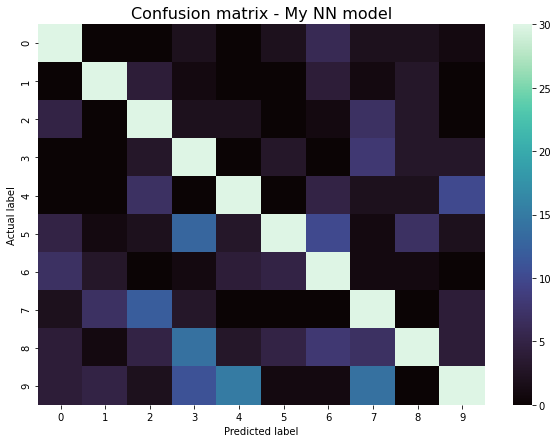

In [23]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap='mako', vmax=30)
plt.title("Confusion matrix - My NN model", fontsize=16)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

Number 4 and 9 can be changed up in some case, or values 3 and 8, or values 5 and 3 as well.